# Resolução dos Desafios

Evandro Avellar

22/04/2020



In [0]:
import pandas as pd
imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")

In [0]:
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query("country == 'USA'")

In [0]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


<hr>

# DESAFIOS

In [0]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4979 non-null   object 
 1   director_name              4895 non-null   object 
 2   num_critic_for_reviews     4949 non-null   float64
 3   duration                   4983 non-null   float64
 4   director_facebook_likes    4895 non-null   float64
 5   actor_3_facebook_likes     4975 non-null   float64
 6   actor_2_name               4985 non-null   object 
 7   actor_1_facebook_likes     4991 non-null   float64
 8   gross                      4124 non-null   float64
 9   genres                     4998 non-null   object 
 10  actor_1_name               4991 non-null   object 
 11  movie_title                4998 non-null   object 
 12  num_voted_users            4998 non-null   int64  
 13  cast_total_facebook_likes  4998 non-null   int64

## Desafio 1 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

In [0]:
imdb_color = imdb.query('color == "Color"')
imdb_bw = imdb.query('color == " Black and White"')

Text(0.5, 0, 'Filmes Coloridos')

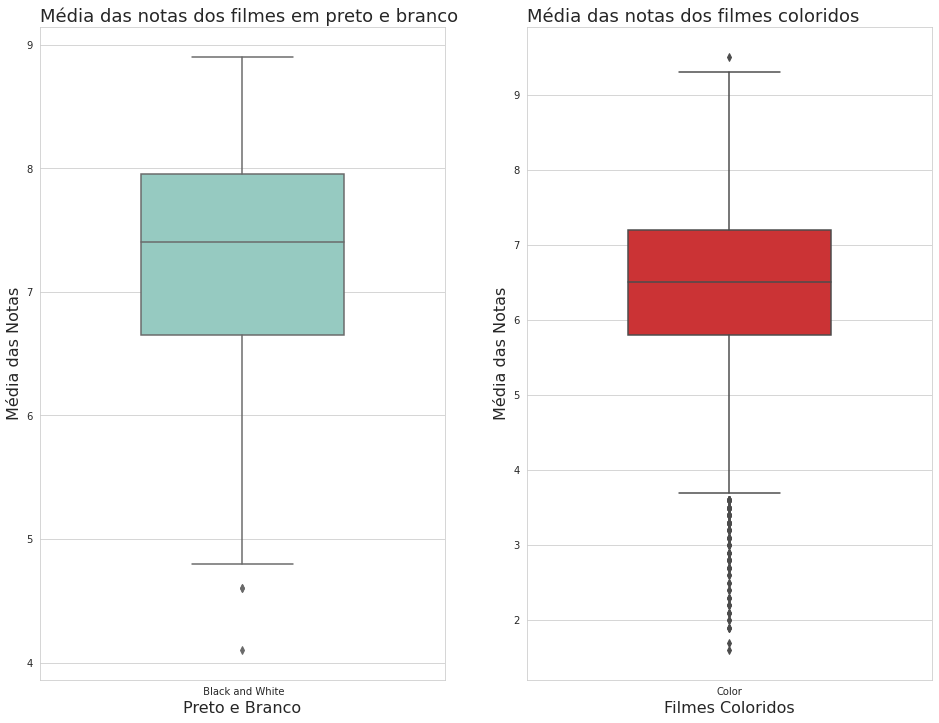

In [0]:
plt.figure(figsize=(16,12))
sns.set_style("whitegrid")

bw = plt.subplot(1,2,1)
sns.boxplot(data = imdb_bw, x ="color", y="imdb_score", width=0.5, palette='Set3')
bw.set_title('Média das notas dos filmes em preto e branco', fontsize=18, loc='left')
bw.set_ylabel('Média das Notas', fontsize=16)
bw.set_xlabel('Preto e Branco', fontsize=16)


cor = plt.subplot(1,2,2)
sns.boxplot(data = imdb_color, x ="color", y="imdb_score", width=0.5, palette='Set1')
cor.set_title('Média das notas dos filmes coloridos', fontsize=18, loc='left')
cor.set_ylabel('Média das Notas', fontsize=16)
cor.set_xlabel('Filmes Coloridos', fontsize=16)


## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

No gráfico de **budget por lucro** temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

In [0]:
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']
df5 = imdb_usa[['movie_title','budget','lucro']].query('budget > 2e8 & lucro < -1.9e8')
df5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,movie_title,budget,lucro
5,John Carter,263700000.0,-190641321.0


### Resposta: O filme é John Carter

## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

In [0]:
df6 = imdb_usa[['title_year', 'gross', 'budget', 'lucro']]
df6.columns = ['Ano', 'Receita', 'Orçamento', 'Lucro']
df7 = df6.groupby('Ano').mean()
df7

,Receita,Orçamento,Lucro
Ano,,,
1916.0,NaN,3.859070e+05,NaN
1920.0,3.000000e+06,1.000000e+05,2.900000e+06
1925.0,NaN,2.450000e+05,NaN
1929.0,2.808000e+06,3.790000e+05,2.429000e+06
1930.0,NaN,3.950000e+06,NaN
...,...,...,...
2012.0,6.270457e+07,4.338150e+07,1.873027e+07
2013.0,6.701127e+07,4.712180e+07,1.490755e+07
2014.0,6.609629e+07,3.732208e+07,2.024915e+07


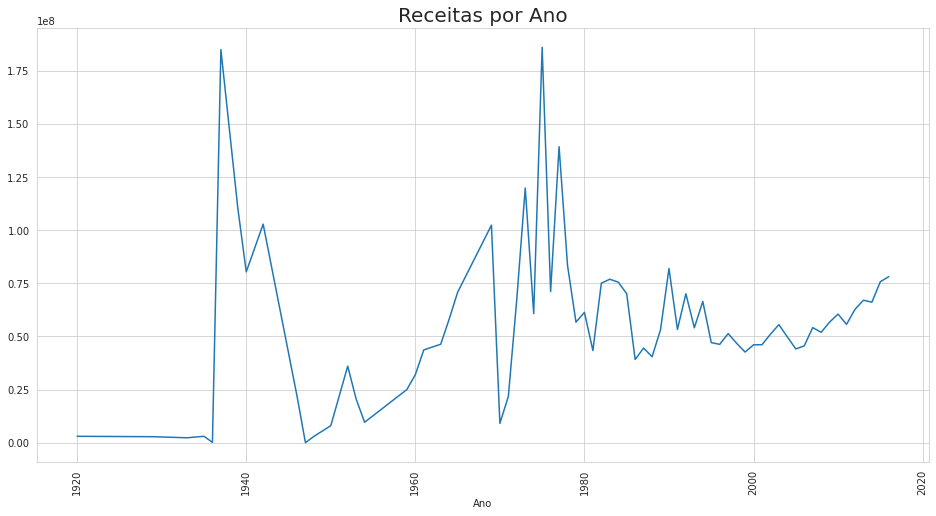

In [0]:
sns.set_style("whitegrid")


receitas_por_ano = df7["Receita"].dropna()
plt.figure(figsize=(16,8))

sns.lineplot(x=receitas_por_ano.index,
            y=receitas_por_ano.values,
           ).set_title('Receitas por Ano', fontsize=20)

plt.xticks(rotation=90)

plt.show()

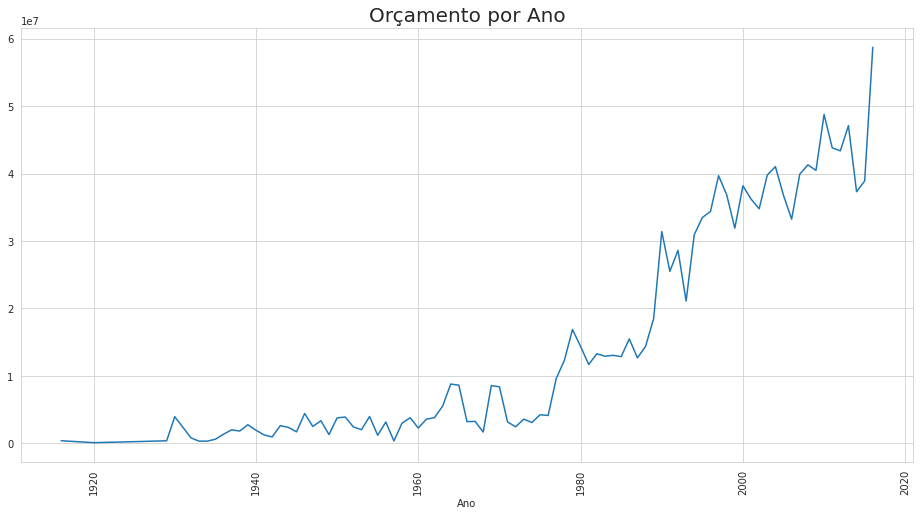

In [0]:
plt.figure(figsize=(16,8))

orcamento_por_ano = df7["Orçamento"].dropna()
sns.lineplot(x=orcamento_por_ano.index,
            y=orcamento_por_ano.values,
           ).set_title('Orçamento por Ano', fontsize=20)

plt.xticks(rotation=90)
plt.show()

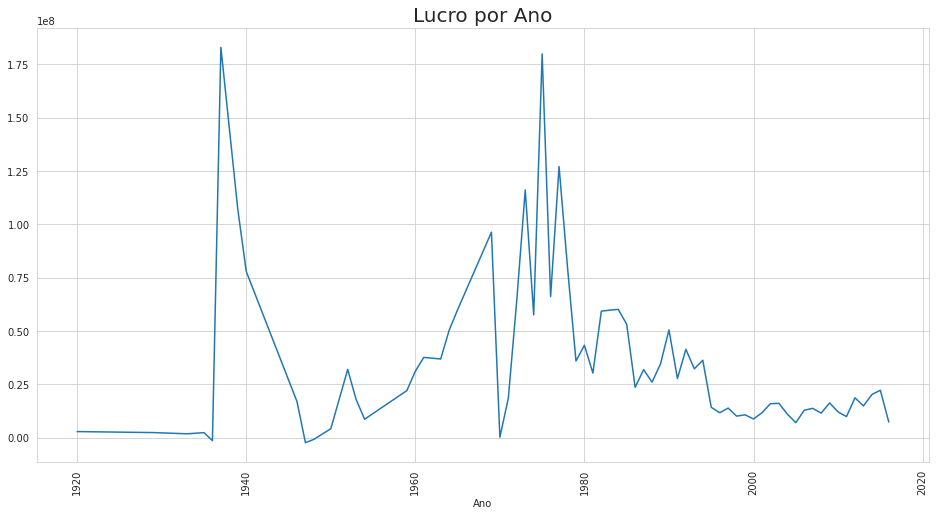

In [0]:
plt.figure(figsize=(16,8))

lucro_por_ano = df7["Lucro"].dropna()
sns.lineplot(x=lucro_por_ano.index,
            y=lucro_por_ano.values,
           ).set_title('Lucro por Ano', fontsize=20)

plt.xticks(rotation=90)
plt.show()

## Conclusão:

- A média de receitas por ano vem crescendo desde o ano 2000
- O orçamento médio vem crescendo desde 1920
- A margem de lucro encontra-se estável desde o ano 2000
- Somente no último ano da base analisada é que possivelmente não tiveram tempo de recuperar o investimento.

## Desafio 4 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

In [0]:
df8 = imdb_usa[['title_year', 'lucro', 'movie_title']].query('title_year > 1929 & title_year < 1940').dropna()
df8.columns = ['Ano', 'Lucro', 'Título']
df8 = df8.sort_values('Lucro')
df8

,Ano,Lucro,Título
4427,1936.0,-1336755.0,Modern Times
4786,1933.0,1861000.0,42nd Street
4706,1935.0,2391000.0,Top Hat
4157,1939.0,19402612.0,The Wizard of Oz
4449,1937.0,182925485.0,Snow White and the Seven Dwarfs
3970,1939.0,194678278.0,Gone with the Wind


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

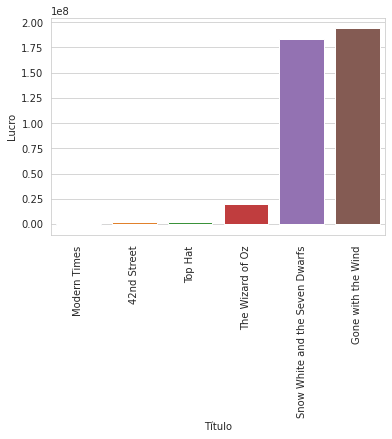

In [0]:
sns.barplot(data=df8, x='Título', y='Lucro')
plt.xticks(rotation=90)

## Conclusão:

- Os filmes da decada pré 2° guerra que tiveram muito lucro foram: "Snow White and the Seven Dwarfs" e "Gone with the Wind"

## Desafio 5 do [Paulo Silveira](https://twitter.com/paulo_caelum)

No gráfico de **filmes_irmaos por dindin** temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

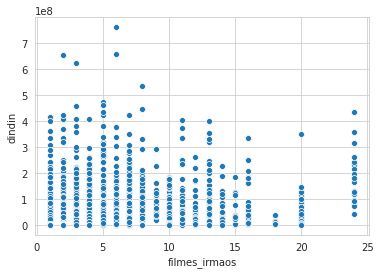

In [0]:
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

In [0]:
gross_director.dropna().query('filmes_irmaos > 16 & filmes_irmaos < 20')

,director_name,dindin,filmes_irmaos
1538,Woody Allen,7496522.0,18.0
1737,Woody Allen,16684352.0,18.0
1861,Woody Allen,13383737.0,18.0
1869,Woody Allen,10569071.0,18.0
1872,Woody Allen,9714482.0,18.0
1960,Woody Allen,33404871.0,18.0
1975,Woody Allen,17071230.0,18.0
1993,Woody Allen,3203044.0,18.0
2070,Woody Allen,14792779.0,18.0
2078,Woody Allen,4839383.0,18.0


## Conclusão:

- Tese confirmada, é o próprio Woody Allen

![title](https://media.gazetadopovo.com.br/2020/04/02173831/Woody-Allen-Divulga%C3%A7%C3%A3o-660x372.jpeg)

## Desafio 6 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

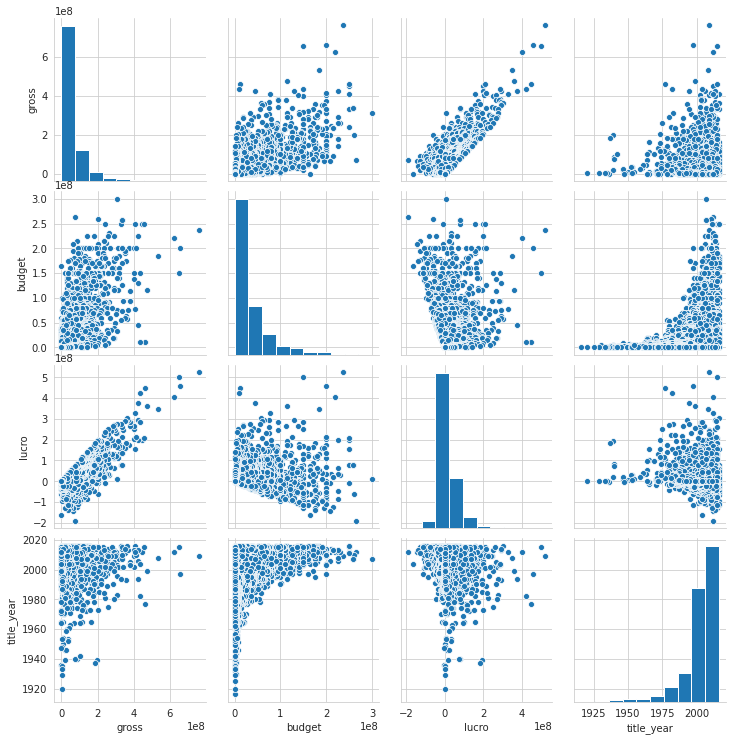

In [0]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

### Conclusões:
- Há uma relação muito forte entre o lucro e a receita do filme
- Gasta-se mais com filmes atualmente que no passado
- Há uma distribuição maior da margem de lucro atualmente entre os filmes, que varia de prejuízos grandes à lucros expressivos

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

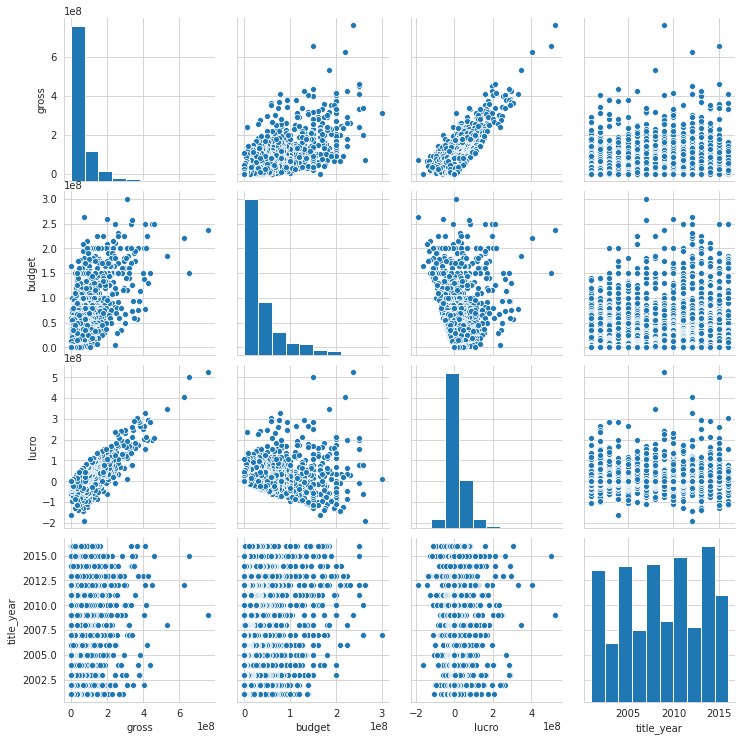

In [0]:
df9 = imdb_usa.query('title_year > 2000')
df9
sns.pairplot(data = df9[["gross", "budget", "lucro", "title_year"]])

### Conclusões:

- Continua uma relação muito forte entre o lucro e a receita do filme (quanto maior a receita maior o lucro)
- Há uma variação grande de gastos com orçamento entre os filmes da amostra
- Há uma certa estabilidade na receita dos filmes nos últimos anos

## Desafio 8 do [Allan Spadini](https://twitter.com/allanspadini)

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

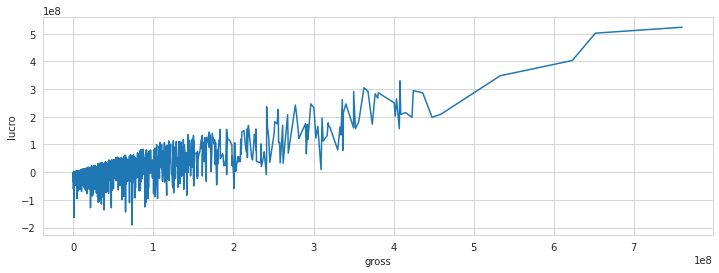

In [0]:
plt.figure(figsize=(12,4))
sns.lineplot(data = df9[["gross", "lucro"]], x='gross', y='lucro')

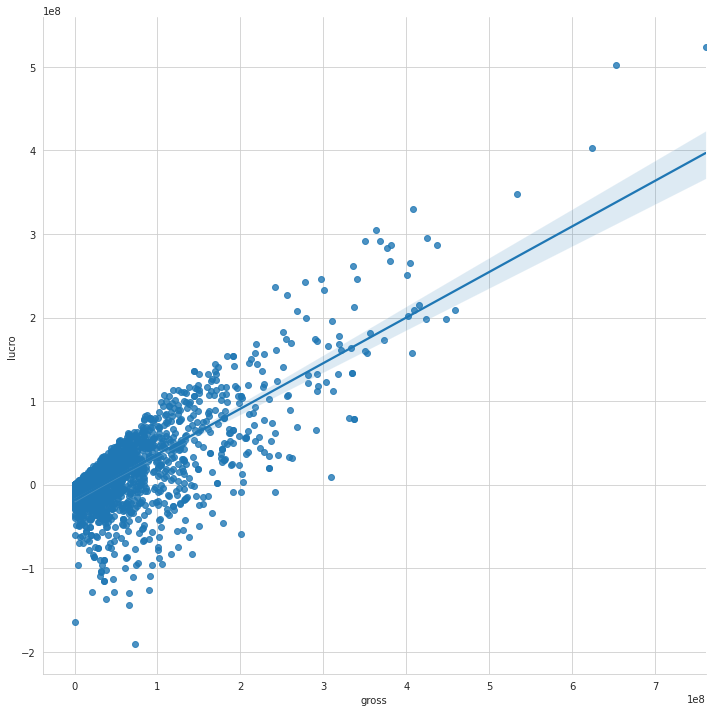

In [0]:

sns.lmplot(x="gross", y="lucro", data=df9[["gross", "lucro"]], height=10, x_jitter=.1)

## Desafio 9 da [Thais André](https://twitter.com/thais_tandre)

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.


In [0]:
dataframe = imdb[['num_voted_users','title_year']].groupby('title_year')
df10 = dataframe.head().dropna().sort_values('title_year')
df10.columns = ['votos', 'anos']
df10.head(10)

,votos,anos
4810,10718,1916.0
4958,5,1920.0
4885,4849,1925.0
2734,111841,1927.0
4664,7431,1929.0
4812,4546,1929.0
3960,3753,1930.0
3755,3519,1932.0
4898,4152,1933.0
4786,7921,1933.0


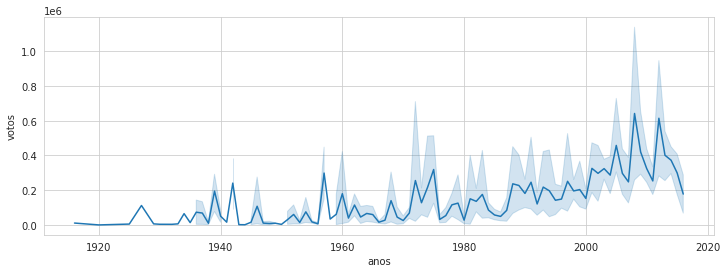

In [0]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df10, x='anos', y='votos')

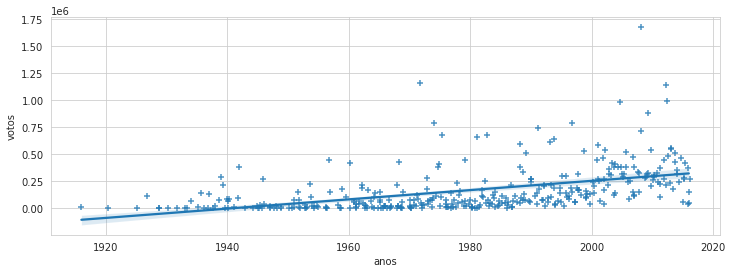

In [0]:
plt.figure(figsize=(12,4))
sns.regplot(data=df10, x='anos', y='votos', x_jitter=.4, marker="+")

### Conclusão:

- Há uma tendência de crescimento de votos para filmes mais recentes

#Não esqueça de compartilhar a solução dos seus desafios com nossos instrutores, seja no Twitter, seja LinkedIn. Boa sorte!